### Student Performance Indicator

##### Life Cycle of Mahcine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose Best Model

1. Problem Statement

- This project understands how the students performance (test scores) is affected by other variables such as Gender, Ethnicity, Paremtal Level of Education, Lunch and Test Preparation Course
   
2.1 import Data and Required Packages

Import Pandas, Numpy, Matplotlib, Seaborn, and Warings Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Import the CSV Data in Panda DataFrame

In [2]:
data = pd.read_csv('data/stud.csv')

### Show Top 5 Records

In [5]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
# Check the column's unqiue entries.
data["test_preparation_course"].unique()

array(['none', 'completed'], dtype=object)

### Shape of the Dataset

In [4]:
data.shape

(1000, 8)

2.2 Dataset Information

- gender: sex of students -> (Male, Female)
- race_ethnicity: Ethnicity of Students -> (Group A,B,C,D,E)
- parental_level_of_education: Parental Final Education -> (bachelor's degree, some college, master's degree, associate's degree, high school, some high school)
- lunch: Having lunch before test -> (standard, free/reduced)
- test_preparation_course: It will let us that whether our test completed or not
- math_score: total obtain score in Math Subject
- reading_score: total obtain score in Reading
- writing_score: total obtain score in Writing

3. Data Checks to Perform
   
- Check Missing Values
- Check Duplicates
- Check Data Type
- Chweck the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

3.1 Check Missing Values
(If there is any missing values, then we can use Mean Mutation)

In [11]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

3.2 Check Duplicates

In [14]:
data.duplicated().sum()

0

3.3 Check Data Types

In [16]:
# Check Null and Dtypes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the number of unique values of each column

In [19]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [20]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight

- From above description of numerical data, all means are very close to earh other - between 66 and 68.05;
- All Standard Deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 abd fir reading minimum = 17

### 3.7 Exploring Data

In [24]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
print(f"Categories in 'gender' variable: {data.gender.unique()}")

print(f"Categories in 'race_ethnicity' variable: {data.race_ethnicity.unique()}")

print(f"Categories in 'parental_level_of_education' variable: {data.parental_level_of_education.unique()}")

print(f"Categories in 'test_preparation_course' variable: {data.test_preparation_course.unique()}")

# print(f"Categories in 'math_score' variable: {data.math_score.unique()}")

# print(f"Categories in 'reading_score' variable: {data.reading_score.unique()}")

# print(f"Categories in 'writing_score' variable: {data.writing_score.unique()}")

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [28]:
# define Numerical & Categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# Print Columns
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.8 Adding Columns for "Total Score" and "Average"

In [32]:
data["total_score"] = data["math_score"] + data["reading_score"] + data["writing_score"]
data["average"] = data["total_score"] / len(numeric_features)
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [33]:
reading_full = data[data["reading_score"] == 100]["average"].count()
writing_full = data[data["writing_score"] == 100]["average"].count()
math_full = data[data["math_score"] == 100]["average"].count()

print(f"Number of students with full marks in Math: {math_full}")
print(f"Number of students with full marks in Writing: {writing_full}")
print(f"Number of students with full marks in Reading: {reading_full}")

Number of students with full marks in Math: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [35]:
reading_less_20 = data[data["reading_score"] <= 20]["average"].count()
writing_less_20 = data[data["writing_score"] <= 20]["average"].count()
math_less_20 = data[data["math_score"] <= 20]["average"].count()

print(f"Number of students with less than 20 marks in Math: {math_less_20}")
print(f"Number of students with less than 20 marks in Writing: {writing_less_20}")
print(f"Number of students with less than 20 marks in Reading: {reading_less_20}")

Number of students with less than 20 marks in Math: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights

- From above values we get students have performed the worst in Maths.
- Besgt performance is in reading section

### 4. Exploring Data (Visualization)

##### 4.1 Visualize average score distribution to make some conclusion

- Histrogram
- Kernel Distribution Function (KDE)

##### 4.1.1 Histrogram & KDE

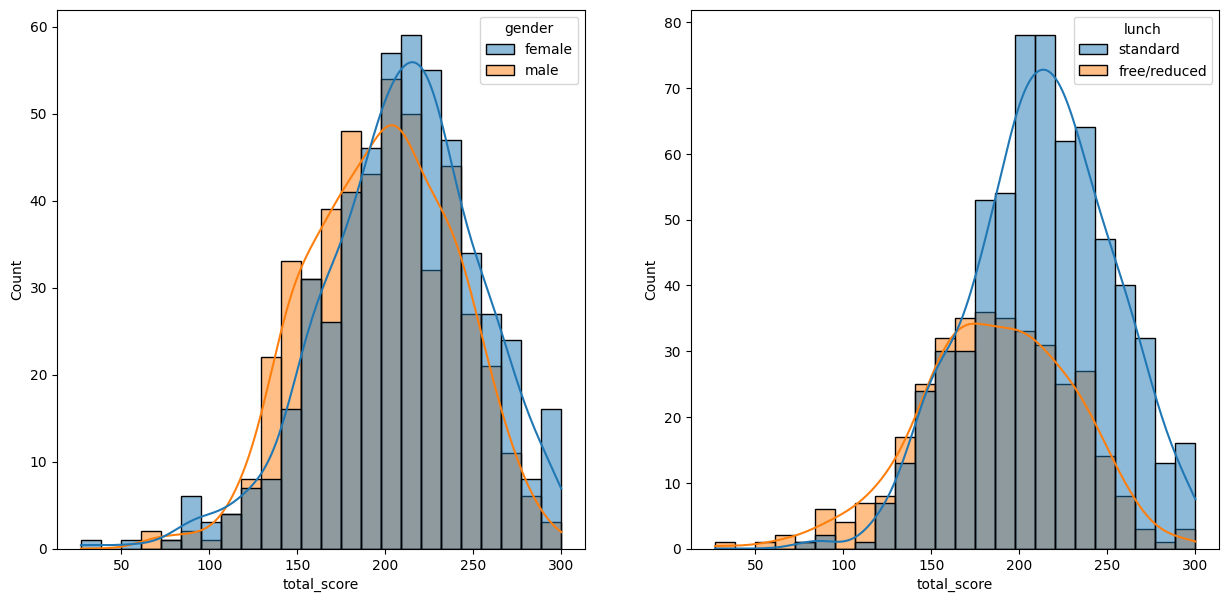

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data, x="total_score", kde=True, hue="gender", color="g")
plt.subplot(122)
sns.histplot(data=data, x="total_score", kde=True, hue="lunch", color="g")
plt.show()